In [ ]:
#Phần 1

In [ ]:
#1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.
import pandas as pd

def load_data(file_path):
    """
    Hàm tải dữ liệu từ file CSV và trả về một DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        return f"Đã xảy ra lỗi khi tải dữ liệu: {e}"

# Đường dẫn đến file dữ liệu
file_path = 'titanic_disaster.csv'

# Gọi hàm load_data
df = load_data(file_path)

# Hiển thị 10 dòng đầu tiên
if isinstance(df, pd.DataFrame):
    print("10 dòng đầu tiên của dữ liệu:")
    print(df.head(10))
else:
    print(df)

10 dòng đầu tiên của dữ liệu:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCar

10 dòng dữ liệu đầu tiên:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy,

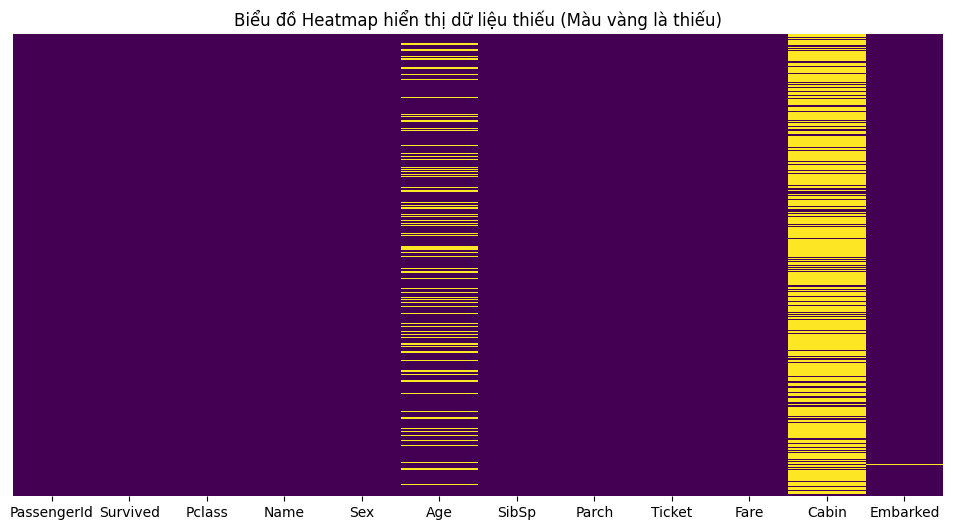

In [ ]:
#2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat
#map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path):
    """
    Hàm tải dữ liệu từ file CSV.
    """
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        return None

def analyze_missing_data(df):
    """
    Hàm thống kê và trực quan hóa dữ liệu thiếu.
    """
    # 1. Thống kê số lượng và tỉ lệ dữ liệu thiếu
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percent_missing = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)

    missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])

    # Chỉ lấy những cột có dữ liệu thiếu để hiển thị
    missing_data = missing_data[missing_data['Total'] > 0]

    print("Bảng thống kê dữ liệu thiếu:")
    print(missing_data)

    # 2. Trực quan hóa bằng biểu đồ Heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Biểu đồ Heatmap hiển thị dữ liệu thiếu (Màu vàng là thiếu)')
    plt.show()

# --- Chương trình chính ---

# Đường dẫn file (bạn hãy thay đổi nếu cần)
file_path = 'titanic_disaster.csv'

# Tải dữ liệu
df = load_data(file_path)

if df is not None:
    # Hiển thị 10 dòng đầu
    print("10 dòng dữ liệu đầu tiên:")
    print(df.head(10))
    print("-" * 30)

    # Thực hiện thống kê và vẽ biểu đồ
    analyze_missing_data(df)
else:
    print("Không tìm thấy file dữ liệu.")

#   Cabin (Khoang hành khách):
# Tình trạng: Thiếu rất nhiều dữ liệu, lên tới 77.1%.
# Nhận xét: Việc thiếu gần 80% dữ liệu biến này làm cho nó trở nên rất khó sử dụng trực tiếp trong các mô hình phân tích hoặc dự đoán nếu không có biện pháp xử lý mạnh tay (như loại bỏ cột hoặc biến đổi thành biến nhị phân "Có Cabin/Không Cabin"). Nguyên nhân có thể do thông tin này không được ghi chép đầy đủ hoặc thất lạc nhiều.

#   Age (Tuổi):
# Tình trạng: Thiếu khoảng 19.9% dữ liệu.
# Nhận xét: Tỉ lệ thiếu khoảng 20% là một con số đáng kể nhưng vẫn có thể xử lý được. Tuổi là một yếu tố quan trọng ảnh hưởng đến khả năng sống sót (ưu tiên trẻ em và người già), nên thay vì xóa bỏ các dòng thiếu, ta nên cân nhắc các phương pháp điền dữ liệu (imputation) như dùng giá trị trung bình, trung vị, hoặc dự đoán tuổi dựa trên các đặc trưng khác (như danh xưng Mr, Mrs, Miss trong tên).

#   Embarked (Cảng lên tàu):
# Tình trạng: Chỉ thiếu 2 giá trị (chiếm 0.22%).
# Nhận xét: Tỉ lệ thiếu rất nhỏ, không đáng kể. Ta có thể dễ dàng xử lý bằng cách điền giá trị xuất hiện nhiều nhất (mode) hoặc đơn giản là loại bỏ 2 dòng này mà không ảnh hưởng nhiều đến toàn bộ tập dữ liệu.

In [ ]:
#3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi
#tách cột xong thì xóa luôn cột Name

# 1. Tải dữ liệu
df = pd.read_csv('titanic_disaster.csv')

# 2. Tách cột 'Name' thành 2 cột dựa trên dấu phẩy
# Cấu trúc tên thường là: "Họ (Surname), Danh xưng. Tên (Given Name)"
# Chúng ta sẽ tách thành 2 phần: Trước dấu phẩy và Sau dấu phẩy.
split_data = df['Name'].str.split(',', n=1, expand=True)

# 3. Gán vào các cột mới
# Phần 0 (Trước dấu phẩy) là Họ -> gán vào secondName
df['secondName'] = split_data[0]

# Phần 1 (Sau dấu phẩy) là Tên và danh xưng -> gán vào firstName
df['firstName'] = split_data[1]

# Loại bỏ khoảng trắng thừa ở đầu/cuối chuỗi (do sau dấu phẩy thường có khoảng trắng)
df['firstName'] = df['firstName'].str.strip()
df['secondName'] = df['secondName'].str.strip()

# 4. Xóa cột 'Name' gốc
df = df.drop(columns=['Name'])

# 5. Hiển thị kết quả để kiểm tra
print("Dữ liệu sau khi tách cột Name:")
print(df[['firstName', 'secondName']].head(10))

print("\nToàn bộ DataFrame sau khi xử lý:")
print(df.head())

Dữ liệu sau khi tách cột Name:
                                    firstName secondName
0                             Mr. Owen Harris     Braund
1  Mrs. John Bradley (Florence Briggs Thayer)    Cumings
2                                 Miss. Laina  Heikkinen
3          Mrs. Jacques Heath (Lily May Peel)   Futrelle
4                           Mr. William Henry      Allen
5                                   Mr. James      Moran
6                               Mr. Timothy J   McCarthy
7                       Master. Gosta Leonard    Palsson
8    Mrs. Oscar W (Elisabeth Vilhelmina Berg)    Johnson
9                 Mrs. Nicholas (Adele Achem)     Nasser

Toàn bộ DataFrame sau khi xử lý:
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      

In [ ]:
#4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

# 1. Tải dữ liệu
df = pd.read_csv('titanic_disaster.csv')

# 2. Thay thế giá trị trong cột 'Sex'
# Cách 1: Sử dụng hàm replace
df['Sex'] = df['Sex'].replace({'male': 'M', 'female': 'F'})

# (Cách 2 tham khảo: Sử dụng map)
# df['Sex'] = df['Sex'].map({'male': 'M', 'female': 'F'})

# 3. Hiển thị kết quả kiểm tra
print("Dữ liệu sau khi rút gọn cột Sex:")
print(df[['PassengerId', 'Sex', 'Name']].head(10))

Dữ liệu sau khi rút gọn cột Sex:
   PassengerId Sex                                               Name
0            1   M                            Braund, Mr. Owen Harris
1            2   F  Cumings, Mrs. John Bradley (Florence Briggs Th...
2            3   F                             Heikkinen, Miss. Laina
3            4   F       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4            5   M                           Allen, Mr. William Henry
5            6   M                                   Moran, Mr. James
6            7   M                            McCarthy, Mr. Timothy J
7            8   M                     Palsson, Master. Gosta Leonard
8            9   F  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10   F                Nasser, Mrs. Nicholas (Adele Achem)


/tmp/ipython-input-3242925076.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')


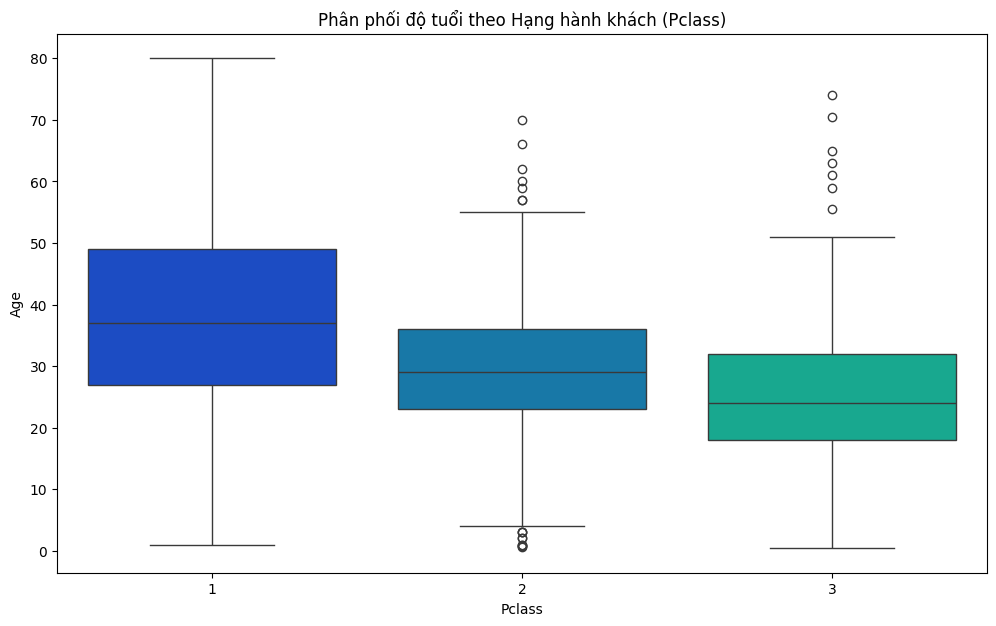

Tuổi trung bình theo từng hạng (Pclass):
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Bảng dữ liệu sau khi xử lý cột Age (10 dòng đầu):
   PassengerId  Pclass       Age
0            1       3  22.00000
1            2       1  38.00000
2            3       3  26.00000
3            4       1  35.00000
4            5       3  35.00000
5            6       3  25.14062
6            7       1  54.00000
7            8       3   2.00000
8            9       3  27.00000
9           10       2  14.00000


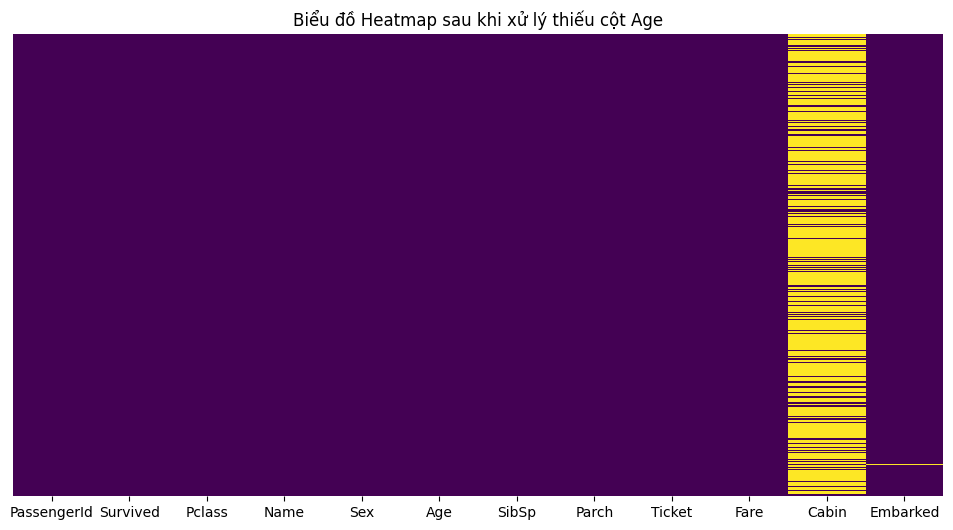

In [ ]:
#5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa
#ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng
#vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
#a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
#phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
#hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.
#b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
#quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map.

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tải dữ liệu
df = pd.read_csv('titanic_disaster.csv')

# --- BƯỚC A: TRỰC QUAN HÓA VÀ QUYẾT ĐỊNH ---

# Vẽ biểu đồ Box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
plt.title('Phân phối độ tuổi theo Hạng hành khách (Pclass)')
plt.show()

# Tính tuổi trung bình theo từng hạng để kiểm tra
print("Tuổi trung bình theo từng hạng (Pclass):")
print(df.groupby('Pclass')['Age'].mean())

# --- BƯỚC B: XỬ LÝ DỮ LIỆU THIẾU VÀ HIỂN THỊ KẾT QUẢ ---

# Cách xử lý: Điền giá trị thiếu bằng trung bình của nhóm Pclass tương ứng
# Sử dụng transform để tính mean cho từng nhóm và fillna trực tiếp
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))

# Hiển thị 10 dòng đầu tiên sau khi xử lý để kiểm tra
print("\nBảng dữ liệu sau khi xử lý cột Age (10 dòng đầu):")
print(df[['PassengerId', 'Pclass', 'Age']].head(10))

# Vẽ biểu đồ Heatmap để xác nhận đã hết dữ liệu thiếu ở cột Age
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Biểu đồ Heatmap sau khi xử lý thiếu cột Age')
plt.show()


In [ ]:
#6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
#trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
#và ( age > 60): Older

# 1. Tải dữ liệu
df = pd.read_csv('titanic_disaster.csv')

# 2. Xử lý dữ liệu thiếu cho cột Age (để đảm bảo mọi hành khách đều được phân nhóm)
# Thay thế giá trị thiếu bằng tuổi trung bình của từng hạng vé (Pclass)
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'))

# 3. Tạo biến Agegroup bằng cách chia nhóm (binning)
# Các khoảng chia:
#   (-1, 12] -> Kid (Dùng -1 để bao gồm cả các bé dưới 1 tuổi nếu có)
#   (12, 18] -> Teen
#   (18, 60] -> Adult
#   (60, inf] -> Older
bins = [-1, 12, 18, 60, float('inf')]
labels = ['Kid', 'Teen', 'Adult', 'Older']

df['Agegroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 4. Hiển thị kết quả kiểm tra
print("Dữ liệu sau khi tạo nhóm tuổi (10 dòng đầu):")
print(df[['Age', 'Agegroup']].head(10))

# Thống kê số lượng từng nhóm
print("\nSố lượng hành khách theo nhóm tuổi:")
print(df['Agegroup'].value_counts())






Dữ liệu sau khi tạo nhóm tuổi (10 dòng đầu):
        Age Agegroup
0  22.00000    Adult
1  38.00000    Adult
2  26.00000    Adult
3  35.00000    Adult
4  35.00000    Adult
5  25.14062    Adult
6  54.00000    Adult
7   2.00000      Kid
8  27.00000    Adult
9  14.00000     Teen

Số lượng hành khách theo nhóm tuổi:
Agegroup
Adult    730
Teen      70
Kid       69
Older     22
Name: count, dtype: int64


In [ ]:
#7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách  Mr, Mrs, Miss, Master ra khỏi “secondName”

# 1. Tải dữ liệu
df = pd.read_csv('titanic_disaster.csv')

# 2. Xử lý cột Name để tạo ra secondName (nếu chưa có từ bước trước)
# Tách tên thành 2 phần: Trước và Sau dấu phẩy
split_data = df['Name'].str.split(',', n=1, expand=True)
df['firstName'] = split_data[0].str.strip()   # Phần Họ (Ví dụ: Braund)
df['secondName'] = split_data[1].str.strip()  # Phần Danh xưng + Tên (Ví dụ: Mr. Owen Harris)

# 3. Tách namePrefix (Mr, Mrs, Miss, Master...) ra khỏi secondName
# Sử dụng Regex để lấy từ đầu tiên kết thúc bằng dấu chấm (.)
df['namePrefix'] = df['secondName'].str.extract('([A-Za-z]+)\.', expand=False)

# 4. Xóa cột Name gốc (theo yêu cầu quy trình)
df = df.drop(columns=['Name'])

# 5. Hiển thị kết quả
print("Thống kê số lượng các danh xưng (namePrefix) tìm được:")
print(df['namePrefix'].value_counts())

print("\n5 dòng đầu tiên của dữ liệu sau khi tách:")
print(df[['firstName', 'secondName', 'namePrefix']].head())

Thống kê số lượng các danh xưng (namePrefix) tìm được:
namePrefix
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

5 dòng đầu tiên của dữ liệu sau khi tách:
   firstName                                  secondName namePrefix
0     Braund                             Mr. Owen Harris         Mr
1    Cumings  Mrs. John Bradley (Florence Briggs Thayer)        Mrs
2  Heikkinen                                 Miss. Laina       Miss
3   Futrelle          Mrs. Jacques Heath (Lily May Peel)        Mrs
4      Allen                           Mr. William Henry         Mr


<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-281068973.py:14: SyntaxWarning: invalid escape sequence '\.'
  df['namePrefix'] = df['secondName'].str.extract('([A-Za-z]+)\.', expand=False)


In [2]:
#8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối
#với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

# Đọc dữ liệu từ file csv
df = pd.read_csv('titanic_disaster.csv')

# Tạo cột FamilySize = 1 (bản thân hành khách) + SibSp (anh chị em/vợ chồng) + Parch (bố mẹ/con cái)
df['FamilySize'] = 1 + df['SibSp'] + df['Parch']

# Hiển thị 5 dòng đầu tiên để kiểm tra kết quả
print(df[['Name', 'SibSp', 'Parch', 'FamilySize']].head())

                                                Name  SibSp  Parch  FamilySize
0                            Braund, Mr. Owen Harris      1      0           2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      1      0           2
2                             Heikkinen, Miss. Laina      0      0           1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      1      0           2
4                           Allen, Mr. William Henry      0      0           1


In [3]:
#9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách
#dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

# Giả sử df là dataframe đã có từ bước trước
# Nếu cần đọc lại file: df = pd.read_csv('titanic_disaster.csv')

# Tính lại FamilySize (nếu chưa có trong bộ nhớ)
df['FamilySize'] = 1 + df['SibSp'] + df['Parch']

# Tạo cột 'Alone'
# Lưu ý: Vì FamilySize tính cả bản thân hành khách (tối thiểu là 1),
# nên điều kiện "đi một mình" tương ứng với FamilySize == 1
df['Alone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Hiển thị kết quả kiểm tra
print(df[['Name', 'FamilySize', 'Alone']].head())

                                                Name  FamilySize  Alone
0                            Braund, Mr. Owen Harris           2      0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           2      0
2                             Heikkinen, Miss. Laina           1      1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)           2      0
4                           Allen, Mr. William Henry           1      1


In [4]:
#10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính
#cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu
#thì thay thế bằng “Unknown”

# Giả sử df là dataframe đã có
# df = pd.read_csv('titanic_disaster.csv')

# Bước 1: Tạo cột typeCabin bằng cách lấy chữ cái đầu tiên của cột Cabin
df['typeCabin'] = df['Cabin'].str[0]

# Bước 2: Thay thế các giá trị bị thiếu (NaN) trong typeCabin bằng "Unknown"
df['typeCabin'] = df['typeCabin'].fillna('Unknown')

# Hiển thị kết quả để kiểm tra
print(df[['Cabin', 'typeCabin']].head())
print(df['typeCabin'].value_counts())

  Cabin typeCabin
0   NaN   Unknown
1   C85         C
2   NaN   Unknown
3  C123         C
4   NaN   Unknown
typeCabin
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


In [9]:
#11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện
#(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.

import pandas as pd

# 1. Đọc dữ liệu
df_train = pd.read_csv('titanic_disaster.csv')
df_test = pd.read_csv('titanic_disaster.csv')

# 2. Loại bỏ dữ liệu thừa trong Test
# Logic: Chỉ giữ lại những hành khách trong Test mà ID của họ KHÔNG xuất hiện trong Train
# Hàm .isin() kiểm tra sự tồn tại, dấu ~ dùng để đảo ngược kết quả (giữ lại cái KHÔNG tồn tại)
df_test_clean = df_test[~df_test['PassengerId'].isin(df_train['PassengerId'])]

# 3. Kiểm tra kết quả
print(f"Số lượng dòng test ban đầu: {len(df_test)}")
print(f"Số lượng dòng test sau khi lọc: {len(df_test_clean)}")

Số lượng dòng test ban đầu: 891
Số lượng dòng test sau khi lọc: 0
